# Lab 1: Exploratory Data Analysis

by Nino Castellano, Will Lahners, Eddie Powers

### 1. Business Understanding

This project was led by a team of data science sales representatives for a toy vehicle distributor based in India. The primary outlook of our assignment given from the corporate offices of the toy company was to perform exploratory data analytics on the existing sales data provided by the company. Ultimately with the goal of examining inventory patterns and sales to help manage and predict future sales, revenue, and inventory for future business ventures. The company's data was collected by their head of controls and analytics Dee Dee who posted and shared the data with us on Kaggle. The data collected is quite large with over 2,500 rows of data, 2,747 to be exact, which include many details about a particular order. The columns of data per row include the following: 
- Order Number
- Quantity of Toys purchased in the order 
- Price per Toy
- Order Line Number
- Number of Sales
- Order Date
- Days Since Last Order
- Shipping Status
- Product Line
- Manufacture Suggested Retail Price (MSRP)
- Product Code
- Customer Name
- Phone Number
- Address Line 1
- City
- Postal Code
- Country
- Last Name
- First Name
- Deal Size

However, a deeper understanding of these data columns is necessary to grasp their significance fully. Firstly, there are repeated order numbers in the dataset because the customer has, in the same order and on the same date, purchased multiple products, each recorded on separate rows per product. In other words, one can consider the Order ID column as unique to a particular customer on a particular day. Secondly, it is important to note the time of the data collection. The oldest order recorded occurred in February 2018 and the most recent in May 2020. Thus, this data can be considered pre-pandemic. The Status columns represent where the order currently states and is primarily classified as either Shipped, Cancelled, Resolved, On Hold, or In Process. Additionally, the Product Line column, which represents the type of toy purchased, primarily consists of Classic Cars, Vintage Cars, Motorcycles, Planes, and Trucks and Busses. The last column that requires additional dialogue is the MSRP, because this will be the basis of where our analytics can assist in future business decisions for the Toy Company. Analyzing and comparing the Manufacturer's Suggested Retail Price (MSRP) against the actual selling price and the quantity ordered serves as the foundation for enhancing future processes within the company. Leveraging analytical and predictive tools to discern patterns and relationships in order data presents a significant opportunity for substantial improvements in business processes. 

=========================

[Dataset: Automobile Sales | Visual EDA](https://www.kaggle.com/code/ddosad/automobile-sales-visual-eda)

Can we identify any seasonal trends in toy sales, and how can this information be used for inventory planning? 

### 2. Data Understanding

##### 2.1 Data Description

In [49]:
#Required Libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from IPython.display import Image

from warnings import filterwarnings
filterwarnings('ignore')

In [50]:
# Loading the file
df = pd.read_csv("https://raw.githubusercontent.com/ncastellano2320/Machine-Learning-in-Python/86d705d3789e7cbfeb3ecabcbd34709c116b456c/Lab1_ExploringTableData/Auto%20Sales%20data.csv?token=GHSAT0AAAAAACNGPIZJTKC4KS2NBQD6INVAZN5MMQQ", parse_dates=['ORDERDATE'], dayfirst=True)

# Replace the deal size to represent small, medium, and large with "1", "2" or "3" respectively. 
df.DEALSIZE.replace(to_replace = ['Small', 'Medium', 'Large'],
                 value = range(1,4), inplace = True)

# Drop unnecessary data
df = df.drop(['PHONE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'ADDRESSLINE1', 'POSTALCODE', 'STATUS', 'ORDERLINENUMBER', 'DAYS_SINCE_LASTORDER', 'ORDERNUMBER', 'PRODUCTCODE'], axis=1)

# Splitting the ORDERDATE column into three separate columns: year, month, and day
df['YEAR'] = df['ORDERDATE'].dt.year
df['MONTH'] = df['ORDERDATE'].dt.month
df['DAY'] = df['ORDERDATE'].dt.day

# Dropping the original ORDERDATE column
df = df.drop(['ORDERDATE'], axis=1)

# Function to map month to quarter
def month_to_quarter(month):
    if month in [1, 2, 3]:
        return 'Q1'
    elif month in [4, 5, 6]:
        return 'Q2'
    elif month in [7, 8, 9]:
        return 'Q3'
    else:
        return 'Q4'

# Map month to quarter and create a new 'Quarter' column
df['QUARTER'] = df['MONTH'].apply(month_to_quarter)

df.head()

,QUANTITYORDERED,PRICEEACH,SALES,PRODUCTLINE,MSRP,CUSTOMERNAME,CITY,COUNTRY,DEALSIZE,YEAR,MONTH,DAY,QUARTER
0,30,95.70,2871.00,Motorcycles,95,Land of Toys Inc.,NYC,USA,1,2018,2,24,Q1
1,34,81.35,2765.90,Motorcycles,95,Reims Collectables,Reims,France,1,2018,5,7,Q2
2,41,94.74,3884.34,Motorcycles,95,Lyon Souveniers,Paris,France,2,2018,7,1,Q3
3,45,83.26,3746.70,Motorcycles,95,Toys4GrownUps.com,Pasadena,USA,2,2018,8,25,Q3
4,36,96.66,3479.76,Motorcycles,95,Technics Stores Inc.,Burlingame,USA,2,2018,10,28,Q4


Not only did we drop some unnecessary data, but we also changed the data type of the "DEALSIZE" variable, as it makes more sense to be processed as integers to represent small, medium, and large with "1", "2" or "3", respectively. It would also be more useful for further analysis to break up the ORDERDATE column into individual year, month, and day to represent which quarter we received the sale in. Also to analyze quarterly sales throughout the year, we  created a new "Quarter" column that represents the quarter we received the sale in.

In [51]:
# Find the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2747 non-null   int64  
 1   PRICEEACH        2747 non-null   float64
 2   SALES            2747 non-null   float64
 3   PRODUCTLINE      2747 non-null   object 
 4   MSRP             2747 non-null   int64  
 5   CUSTOMERNAME     2747 non-null   object 
 6   CITY             2747 non-null   object 
 7   COUNTRY          2747 non-null   object 
 8   DEALSIZE         2747 non-null   int64  
 9   YEAR             2747 non-null   int32  
 10  MONTH            2747 non-null   int32  
 11  DAY              2747 non-null   int32  
 12  QUARTER          2747 non-null   object 
dtypes: float64(2), int32(3), int64(3), object(5)
memory usage: 246.9+ KB


Based on the above output of the dataframe, there are no missing values within our dataset as every column's non-null count adds up to the total number of rows in the data, 2747. 

Because there are no missing rows, it would be unnecessary to do any imputation on the data, as it is a complete dataset. 

In [52]:
# Describe the data
df.describe()

,QUANTITYORDERED,PRICEEACH,SALES,MSRP,DEALSIZE,YEAR,MONTH,DAY
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,35.103021,101.098952,3553.047583,100.691664,1.601747,2018.822352,7.083364,14.306880
std,9.762135,42.042549,1838.953901,40.114802,0.591981,0.696288,3.641826,8.833086
min,6.000000,26.880000,482.130000,33.000000,1.000000,2018.000000,1.000000,1.000000
25%,27.000000,68.745000,2204.350000,68.000000,1.000000,2018.000000,4.000000,6.000000
50%,35.000000,95.550000,3184.800000,99.000000,2.000000,2019.000000,8.000000,14.000000
75%,43.000000,127.100000,4503.095000,124.000000,2.000000,2019.000000,11.000000,21.000000
max,97.000000,252.870000,14082.800000,214.000000,3.000000,2020.000000,12.000000,31.000000


In [53]:
# More detailed descriptions of the data
data_des = pd.DataFrame()

data_des['Features'] = df.columns
data_des['Description'] = ['how many items within the order',
                          'the price at which the items are sold',
                          'total revenue from the order',
                          'type of product',
                          'manufacturer\'s suggested retail price',
                          'name of the customer',
                          'city of the sale',
                          'country of the sale',
                          'size of the deal',
                          'year of the sale',
                          'month of the sale',
                          'day of the sale',
                          'quarter of the sale']
data_des['Scales'] = ['ratio'] + ['interval'] + ['ratio'] + ['nominal'] + ['interval'] + ['nominal'] * 3 + ['ordinal'] + ['interval'] + ['ordinal'] * 3
data_des['Discrete\Continuous'] = ['discrete'] + ['continuous'] * 2 + ['discrete'] + ['continuous'] + ['discrete'] * 8
data_des['Range'] = ['6 - 97', '26.88 - 252.87', '482.13 - 14082.80', 'Varies based on product', '33.00 - 214.00', 'Varies based on customer', 'Varies based on city', 'Varies based on country', '1: Small; 2: Medium; 3: Large', '2018 - 2020', '1 - 12', '1 - 31', 'Q1, Q2, Q3, Q4']

data_des


,Features,Description,Scales,Discrete\Continuous,Range
0,QUANTITYORDERED,how many items within the order,ratio,discrete,6 - 97
1,PRICEEACH,the price at which the items are sold,interval,continuous,26.88 - 252.87
2,SALES,total revenue from the order,ratio,continuous,482.13 - 14082.80
3,PRODUCTLINE,type of product,nominal,discrete,Varies based on product
4,MSRP,manufacturer's suggested retail price,interval,continuous,33.00 - 214.00
5,CUSTOMERNAME,name of the customer,nominal,discrete,Varies based on customer
6,CITY,city of the sale,nominal,discrete,Varies based on city
7,COUNTRY,country of the sale,nominal,discrete,Varies based on country
8,DEALSIZE,size of the deal,ordinal,discrete,1: Small; 2: Medium; 3: Large
9,YEAR,year of the sale,interval,discrete,2018 - 2020


In the table above, we made it easy to visualize the types of data assocaited with our dataset. 

#### 2.2 Data Quality

Because our data contains individual orders, it would be unlikely that there would be any duplicate orders within out dataset.

However, we will still check for duplicates and remove any if necessary, as the duplicate orders would affect our final outcome to answer our question of determining
which season generates the largest sales. 



In [54]:
# Find the duplicate instances
idx = df.duplicated()

# And let's print the length of that array idx
len(df[idx])


0

Thankfully, there are 0 duplicates, so the quality of this data is pretty superb. Let's move on to visulizing the data for further interpretation. 

### 3. Data Visualization

#### 3.1 Data Exploration

Description of the QUANTITYORDERED
-------------------------------------------------------------------------------------------------------------------------------------------------
count    2747.000000
mean       35.103021
std         9.762135
min         6.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        97.000000
Name: QUANTITYORDERED, dtype: float64


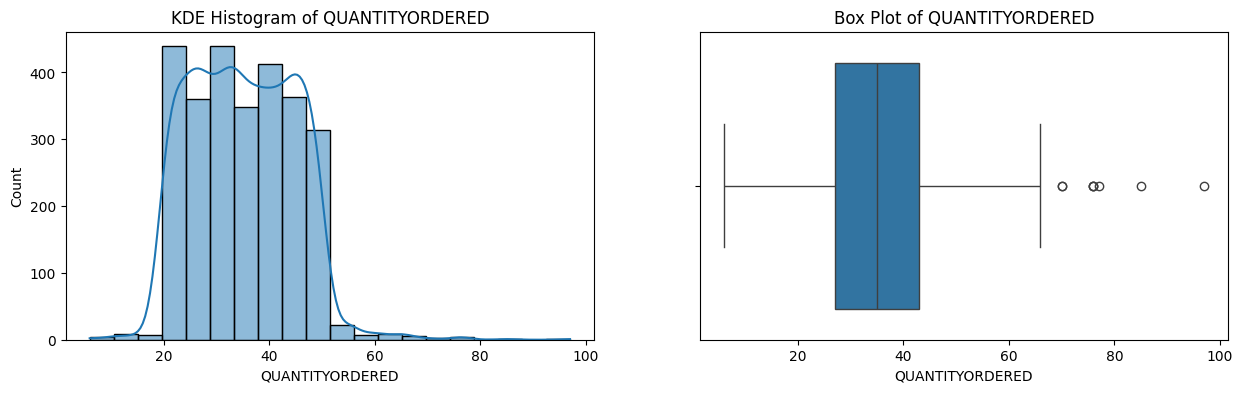

-------------------------------------------------------------------------------------------------------------------------------------------------


In [55]:
# Description and Visualization of 'QUANTITYORDERED'
print("Description of the QUANTITYORDERED")
print("-" * 145)
print(df['QUANTITYORDERED'].describe())
fig, axes = plt.subplots(1,2,figsize=(15,4))

# Histogram and KDE Plot 
sns.histplot(df['QUANTITYORDERED'],bins=20,kde=True,ax=axes[0])
axes[0].set_title("KDE Histogram of QUANTITYORDERED")

# Box Plot 
sns.boxplot(x=df['QUANTITYORDERED'],ax=axes[1])
axes[1].set_title("Box Plot of QUANTITYORDERED")

plt.show()
print("-" * 145)

Above we can see the distribution of the Quantity Ordered variable. First, we have an unimodal histogram with a very slight right skew. Additionally, we used 20 bins to categorize the data. From the histogram, we can conclude that the majority of orders ranged from 20 toy objects to about 50 toy objects. Lastly, the histogram displays three peaks with over 400 orders with certain order sizes. The box plot of order quantities gives us a more numerical sense of the data. The mean order size was 35.1 with a standard deviation of 9.76. The low standard is very useful when planning future inventory management for the company/ The Q1 and Q3 order quantities are 27 and 43, respectively. Lastly, the box plot shows 5 outliers out of 2747 observations. 

Description of the SALES
-------------------------------------------------------------------------------------------------------------------------------------------------
count     2747.000000
mean      3553.047583
std       1838.953901
min        482.130000
25%       2204.350000
50%       3184.800000
75%       4503.095000
max      14082.800000
Name: SALES, dtype: float64


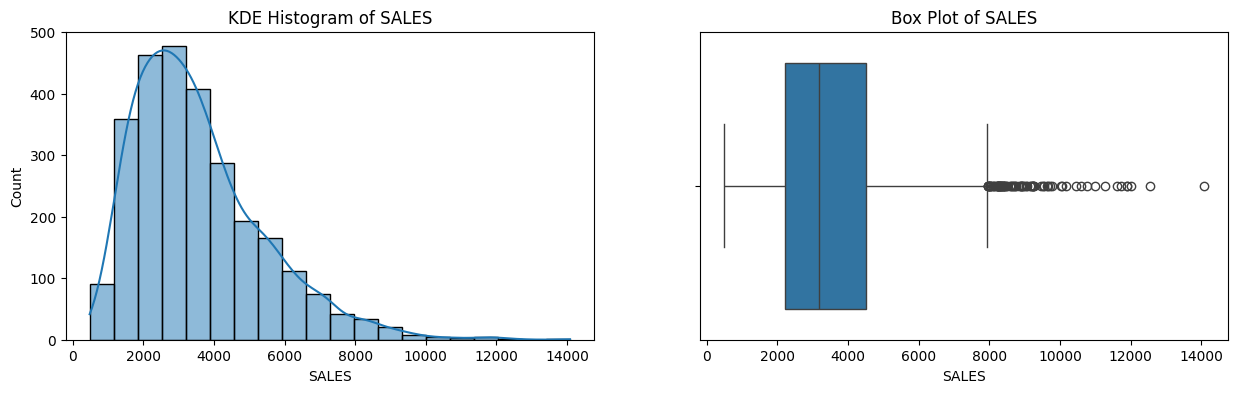

-------------------------------------------------------------------------------------------------------------------------------------------------


In [56]:
# Description and Visualization of 'SALES'
print("Description of the SALES")
print("-" * 145)
print(df['SALES'].describe())
fig, axes = plt.subplots(1,2,figsize=(15,4))

# Histogram and KDE Plot 
sns.histplot(df['SALES'],bins=20,kde=True,ax=axes[0])
axes[0].set_title("KDE Histogram of SALES")

# Box Plot 
sns.boxplot(x=df['SALES'],ax=axes[1])
axes[1].set_title("Box Plot of SALES")

plt.show()
print("-" * 145)

Above is the KDE Histogram and Box Plot of the Sales variable. The Sales variable can be thought of as the revenue made from the sale as it is the order quantity multiplied by the sales price per unit given in the PRICEEACH variable. The Histogram explains a majority of the data and it seems there is a somewhat substantial right-skew in the data. The majority of sales produce somewhere between $2,000 and $4,000 of revenue. The Sales data has an unimodal distribution as well. The Box Plot once again provides a more numerical conclusion when compared to the Histogram. The mean Sales (revenue) was $3,553.04 with a standard deviation of $1,838.95. The Q1 and Q3 revenue are $2,204.35 and $4,503, respectively. Lastly, the box plot shows that there are a substantial amount of outliers with this data and as such we can conclude that this particular data is less uniform. 

Description of the PRICEEACH
-------------------------------------------------------------------------------------------------------------------------------------------------
count    2747.000000
mean      101.098952
std        42.042549
min        26.880000
25%        68.745000
50%        95.550000
75%       127.100000
max       252.870000
Name: PRICEEACH, dtype: float64


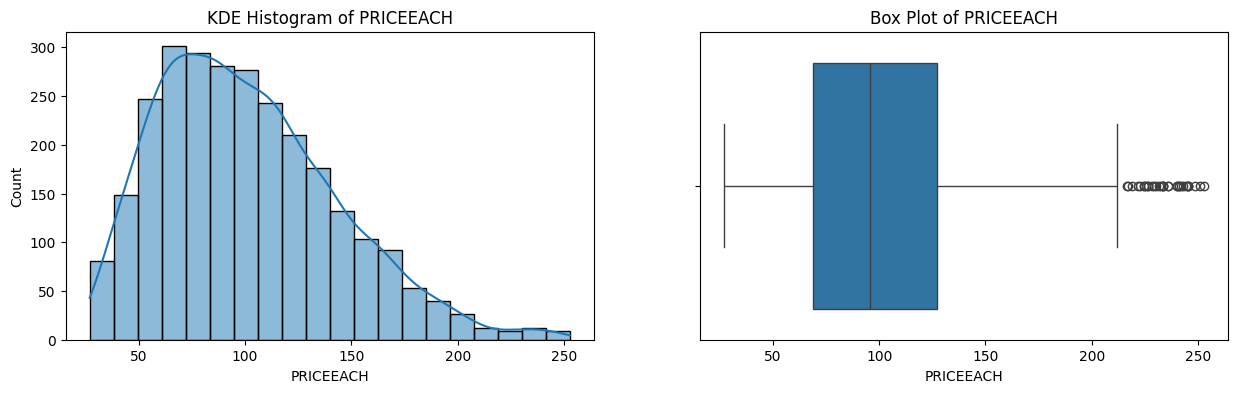

-------------------------------------------------------------------------------------------------------------------------------------------------


In [57]:
# Description and Visualization of 'PRICEEACH'
print("Description of the PRICEEACH")
print("-" * 145)
print(df['PRICEEACH'].describe())
fig, axes = plt.subplots(1,2,figsize=(15,4))

# Histogram and KDE Plot 
sns.histplot(df['PRICEEACH'],bins=20,kde=True,ax=axes[0])
axes[0].set_title("KDE Histogram of PRICEEACH")

# Box Plot 
sns.boxplot(x=df['PRICEEACH'],ax=axes[1])
axes[1].set_title("Box Plot of PRICEEACH")

plt.show()
print("-" * 145)

Above is the Histogram and Box Plot of the PriceEach variable. This variable is crucial to understand with our predictive business approach because not all toys sell for their sticker price or MSRP (Manufacture Suggested Retail Price). The histogram has a wide unimodal distribution with a slight right skew. As such it is more difficult to draw concrete conclusions from the Histogram. The Box Plot, which provides a more numerical breakdown, will be more useful with this particular variable. The mean price per toy of the toy set is $101.09. The standard deviation, $42.04, is rather large when considering the size of the mean, $101.09. As such there is a lot of variability which most likely correlates with the number of toys purchased. The Q1 and Q3 of this variable are $68.74 and $127.10. 

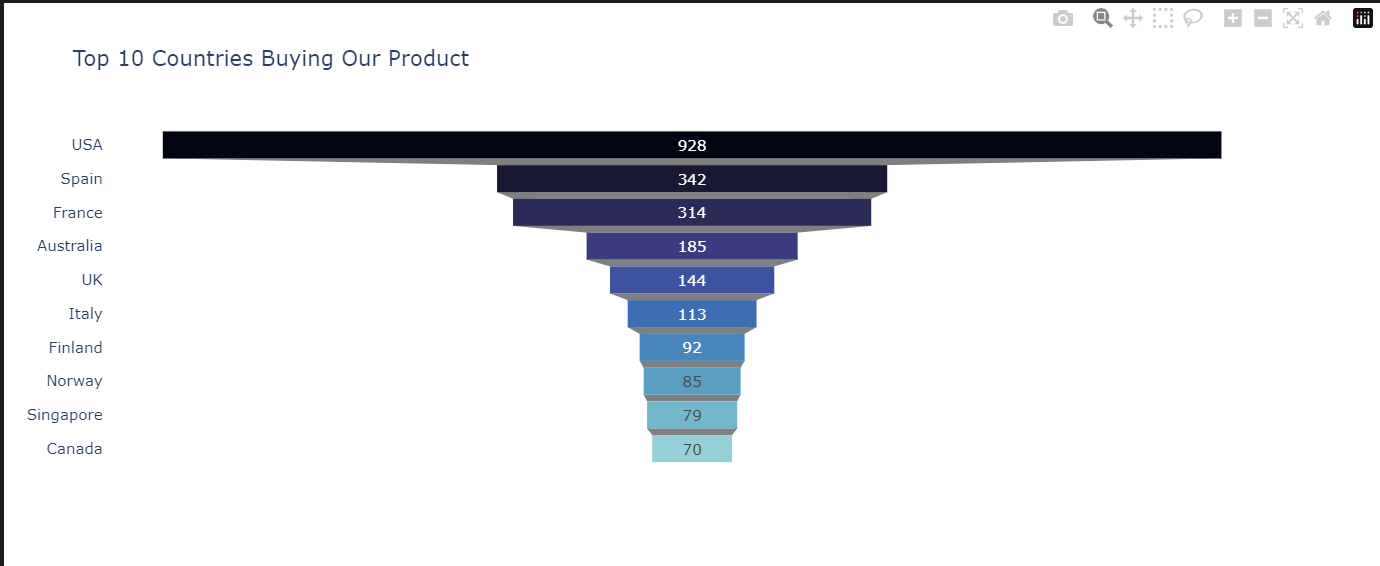

In [58]:
# Top 10 Countries Buying Our Product 
country_counts = df['COUNTRY'].value_counts()[:10]
fig = go.Figure(go.Funnel(y=country_counts.index, x=country_counts.values, textinfo='value', marker={'color': px.colors.sequential.ice}))
fig.update_layout(title_text="Top 10 Countries Buying Our Product", template='plotly_white')
Image(filename="Screenshots/Top10_Countires.png")

The figure above is a rather simple vertical bar chart which represents the 10 countries which toys were purchased from. The USA proved to be by far the most valuable customer country to our buisness. The USA actually had just under three times the number of products purchased than the second country, Spain. Following the USA, Spain, France, Australia, UK, Italy, Finland, Norway, Singapore, and Canada rounded out the top 10. The takeaway from this graph is that corporate offices should dedicate a lot of their marketing resources to the USA as it has such a large customer base. 

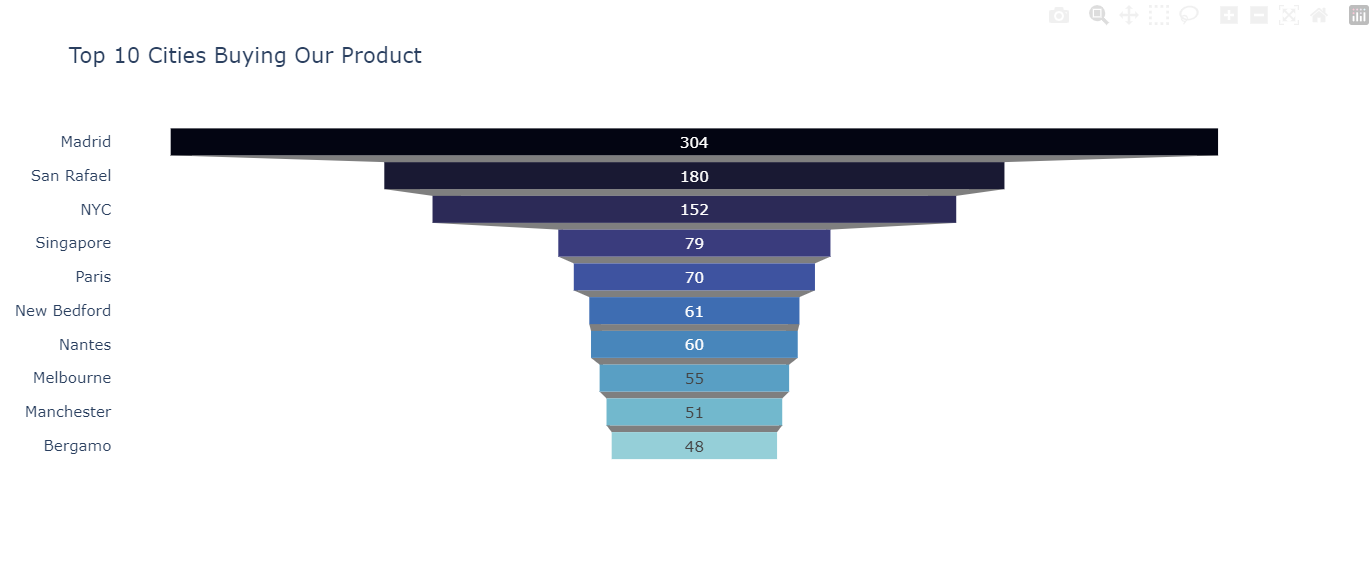

In [59]:
# Top 10 Cities Buying Our Product
city_counts = df['CITY'].value_counts()[:10]
fig = go.Figure(go.Funnel(y=city_counts.index, x=city_counts.values, textinfo='value',marker={'color': px.colors.sequential.ice}))
fig.update_layout(title_text="Top 10 Cities Buying Our Product", template='plotly_white')
Image(filename="Screenshots/Top10_Cities.png")

The vertical Bar Chart above takes the previous Bar Chart, "Most Popular Countries", and refines that down to popular cities. Madrid in Spain has a resounding lead over the subsequent 9 other popular cities. As such we can confidently conclude there is a large toy vehicle market and demand in the city. Marketing tools such as newspaper ads, billboards, and regional virtual ads (social media and television) in the area could provide a large economic boost to the company. The following nine cities that round out the top 10 are as follows: San Rafael, NYC, Singapore, Paris, New Bedford, Nantes, Melbourne, Manchester, and Bergamo. 

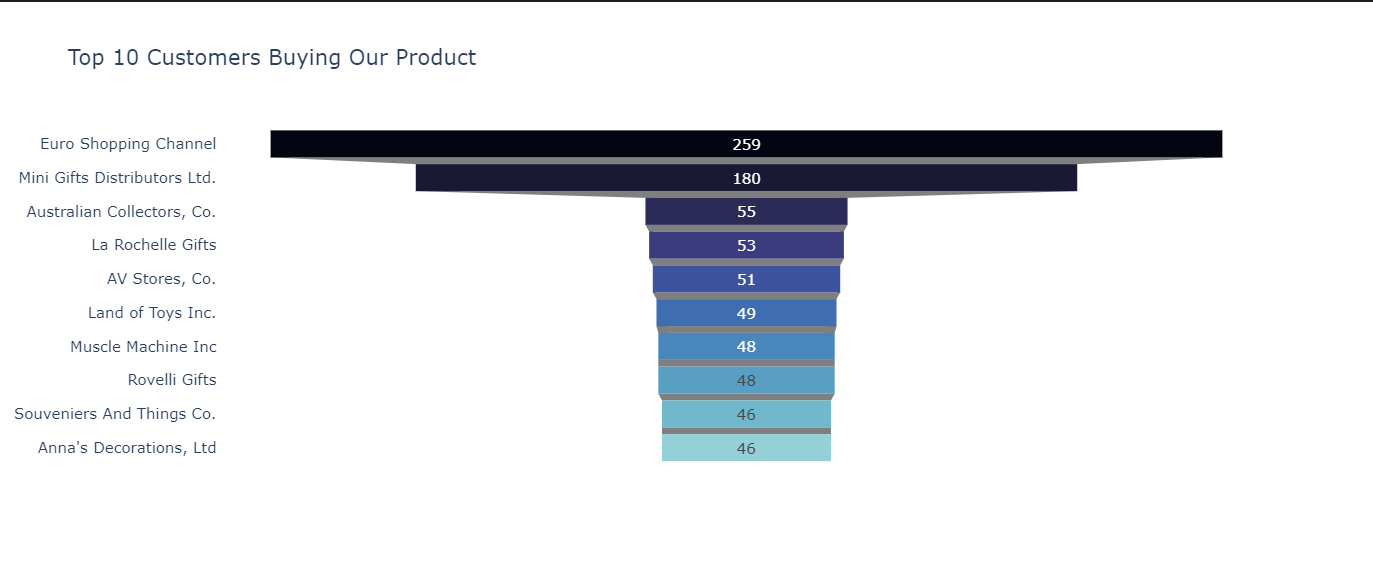

In [60]:
# Top 10 Customers Buying Our Product
top10_customers = df.sort_values(by = "SALES", ascending = False).head(10)
top10_customers = df['CUSTOMERNAME'].value_counts()[:10]
fig = go.Figure(go.Funnel(y=top10_customers.index, x=top10_customers.values, textinfo='value', marker={'color': px.colors.sequential.ice}))
fig.update_layout(title_text="Top 10 Customers Buying Our Product", template='plotly_white')
Image(filename="Screenshots/Top10_Customers.png")

The visualization above represents the Top 10 customers buying our products. The top 2 customers have a substantial lead over the following eight companies. The top two companies are Euro Shipping Channel and Mini Gifts Distributors Ltd. This is an important crossroads for the corporate offices to discuss. Loyal customers such as two mentions could benefit and purchase additional products with the introduction of a reward program similar to airline miles or credit card points. This would incentivize customers to purchase more products in higher quantities and be rewarded with a virtual currency solely controlled by our financial department. The following eight customers round out the top 10: Australian Collectors, Co., La Rochelle Gifts, AV Stores, Co., Land of Toys Inc., Muscle Machine Inc., Rovelli Gifts, Souvenirs And Things Co., and Anna's Decorations Ltd.  

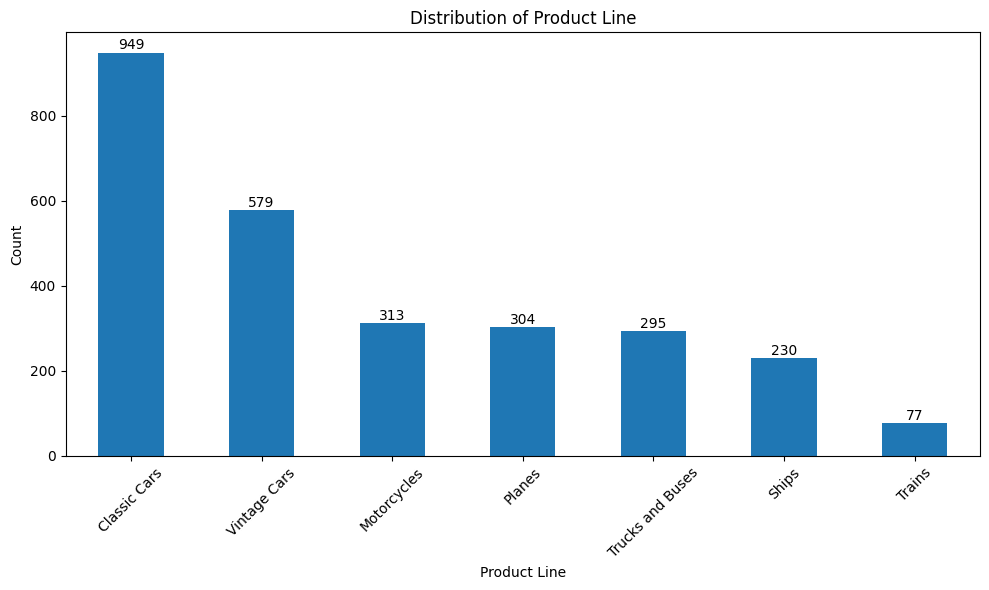

In [61]:
# Distributution of Product Line 
product_line_counts = df['PRODUCTLINE'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
bar_plot = product_line_counts.plot(kind='bar')

# Add counts on top of each bar
for i, count in enumerate(product_line_counts):
    bar_plot.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.xlabel('Product Line')
plt.ylabel('Count')
plt.title('Distribution of Product Line')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The data visualization is a Bar Chart of the Product Line variable. This is a categorical variable of which type of toy was purchased. The seven different toys sold are as follows: Classic Cars, Vintage Cars, Motorcycles, Planes, Trucks and Buses, Ships, and Trains. From the data above, by far the most popular type of toy sold was the Classic Car with 949. Additionally, the second most popular toy sold, Vintage Cars (579), has a substantial lead over the other categories. As such we can confidently report back to the corporate offices that the majority of company focus should surround the Classic and Vintage Toy Car market. This is where the marketing team should place their advertising resources. 

Index(['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP', 'DEALSIZE'], dtype='object') 5


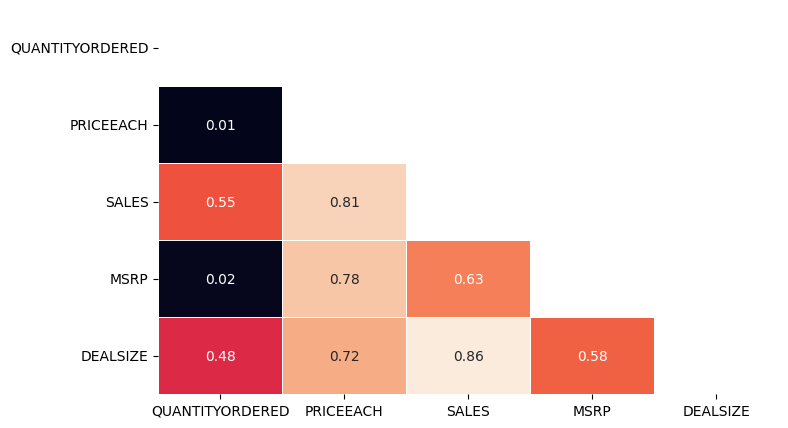

In [62]:
# Correlation Graph for Numerical Features of the dataset
df_num = df.select_dtypes(include=['float64', 'int64'])
print(df_num.columns, len(list(df_num.columns.values)))
corr = df_num.corr(method='pearson')
mask = np.triu(np.ones_like(corr))
fig = plt.subplots(figsize=(8, 5))
sns.heatmap(corr, annot=True,fmt='.2f',mask=mask, cbar=None, linewidth=0.5)
plt.show()

The above data visualization represents a correlation matrix of the variables used in our data science research project. As would seem obvious, the DEALSIZE variable has a 72% correlation with the price per each. Additionally, MSRP has a 78% correlation with PRICEEACH. These are really crucial takeaways that confirm our team's earlier predictions that those variables go hand in hand. This is not unique to the Toy Vehicle market and is the exact same reason the retail giant Costco is so successful. There is a tremendous opportunity if we could centralize the buy in bulk for a discount, specifically targeted marketing in target cities, and the possible introduction of a rewards program. The other takeaway from the correlation coefficient matrix are 86% correlation between DEALSIZE and SALES, this also makes sense because DEALSIZEW is used to mathematically calculate SALES, and the same conclusion can be drawn from SALES and PRICEEACH. The takeaway from this matrix reinforced the tremendous economic opportunity for our Toy Company. 

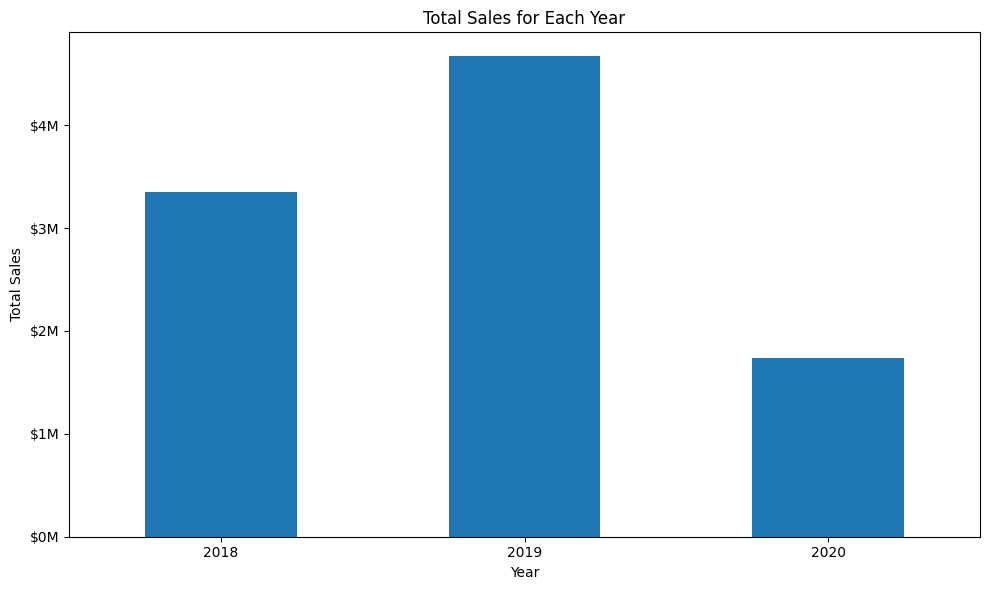

In [63]:
# Sales by Year
from matplotlib.ticker import FuncFormatter

# Assuming df is your DataFrame containing the 'YEAR' and 'SALES' columns

# Group the DataFrame by 'YEAR' and sum up the 'SALES' for each year
yearly_sales = df.groupby('YEAR')['SALES'].sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales for Each Year')

# Format y-axis ticks to display values in millions
formatter = FuncFormatter(lambda x, _: '${:,.0f}M'.format(x / 1000000))
plt.gca().yaxis.set_major_formatter(formatter)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The bar chart above summarizes the revenue from each year in millions of dollars. 2019 was bar far and away the most successful but there are only factors to take into consideration with this conclusion. 2019 was the only entire year covered in the data set to have sales data reported. Additionally, in 2020 the pandemic hit had a large economic falling out on many people. As such the disposable income from which people used to purchase Toys Vehicles in previous years no longer existed.  

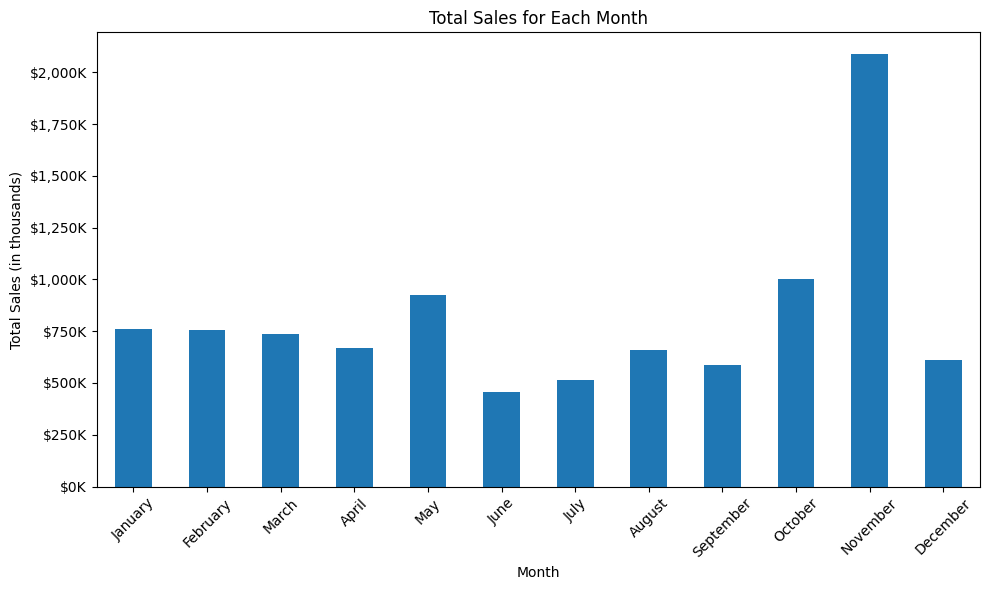

In [64]:
# Sales by Month 
# Define month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Group the DataFrame by 'Month' and sum up the 'SALES' for each month
monthly_sales = df.groupby('MONTH')['SALES'].sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Total Sales (in thousands)')  # Updated y-axis label

# Format y-axis ticks to display values in hundreds of thousands
formatter = FuncFormatter(lambda x, _: '${:,.0f}K'.format(x / 1000))
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Total Sales for Each Month')
plt.xticks(range(12), [month_names[month] for month in range(1, 13)], rotation=45)

plt.tight_layout()
plt.show()

The data visualization above is a Bar Chart that breaks down the toy sales in the month in which they occurred. The one major takeaway from the graph above is the month of November proves to be very strong. The obvious and default reason behind this is the upcoming holiday period in the following month. As such this should be thought of as the major time for inventory to be stocked and marketing teams to use a significant amount of market resources in the month before, October. Other than minor spikes in May and October and a slight dip in December (slightly surprising) the sales data remains mostly consistent from month to month.

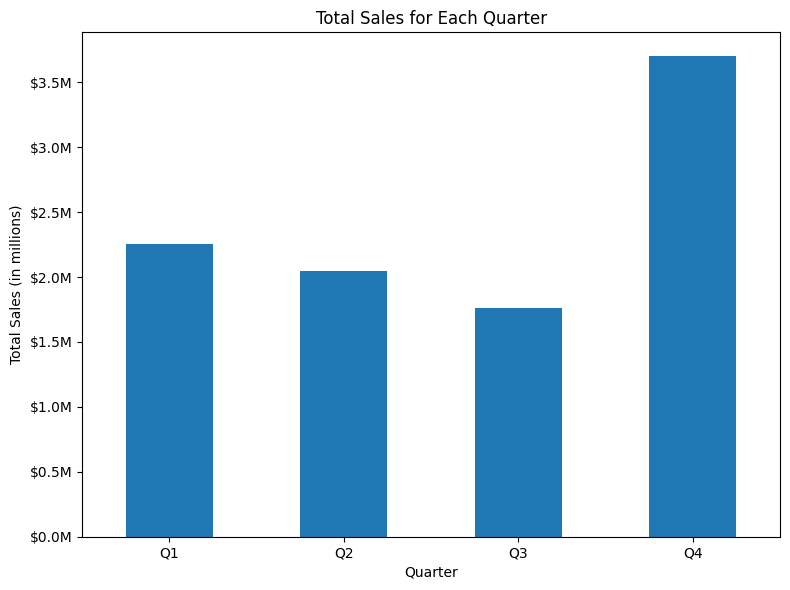

In [65]:
# Sales by Quarter
# Group the DataFrame by 'Quarter' and sum up the 'SALES' for each quarter
quarterly_sales = df.groupby('QUARTER')['SALES'].sum()

# Plot the bar chart
plt.figure(figsize=(8, 6))
quarterly_sales.plot(kind='bar')
plt.xlabel('Quarter')
plt.ylabel('Total Sales (in millions)')  # Updated y-axis label

# Format y-axis ticks to display values in millions
formatter = FuncFormatter(lambda x, _: '${:,.1f}M'.format(x / 1000000))
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Total Sales for Each Quarter')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The above Bar Chart of sales by quarter reinforces the conclusions drawn from the monthly report. The large number of sales in Q4 can be attributed to the month of November and subsequent Holiday period. However, an additional observation from the quarterly data is the consistent decrease from Q1 to Q2 and again from Q2 to Q3. As such we can confidently conclude that people buy fewer Toy Vehicles in the summer months. This could be an area to attack for the marketing department. If it was possible to bump the numbers in Q3 to Q1 levels the economic impact on the company should be significant. The sales team along with the other marketing measures could look into a "Summer Sale" of sorts to boost these numbers. 

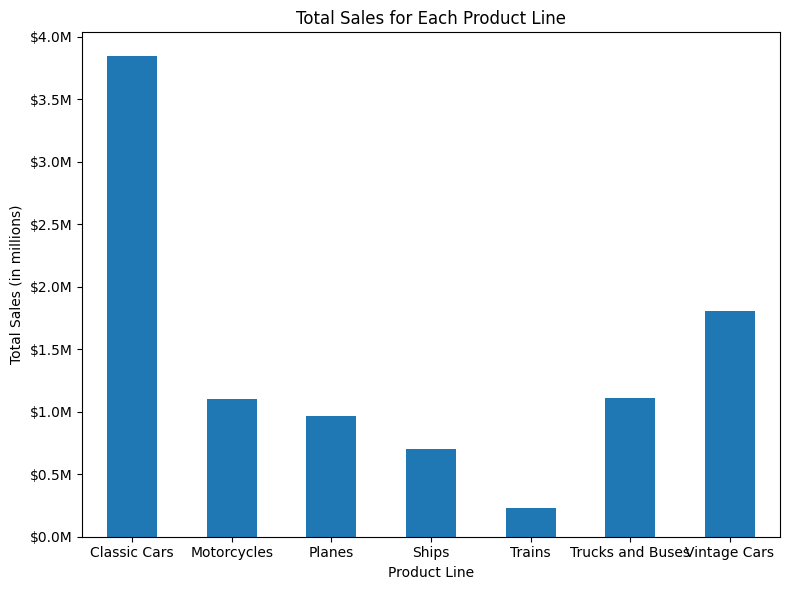

In [66]:
# Sales by Product Line
productline_sales = df.groupby('PRODUCTLINE')['SALES'].sum()

# Plot the bar chart
plt.figure(figsize=(8, 6))
productline_sales.plot(kind='bar')
plt.xlabel('Product Line')
plt.ylabel('Total Sales (in millions)')  # Updated y-axis label

# Format y-axis ticks to display values in millions
formatter = FuncFormatter(lambda x, _: '${:,.1f}M'.format(x / 1000000))
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Total Sales for Each Product Line')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The Bar Cart above represents a breakdown of revenue from each of the different types of Toy vehicles. Unsurprisingly, and reinforcing the conclusions from prior visualizations, the Classic Cars are the bread and butter of this Toy Company and alone amassed just under $4.0 Million in revenue. Vintage Cars also proved to be very lucrative, amassing roughly $2.0 Million in sales as well. Unfortunately, it is obvious to see that Trains sales are just not there. Corporations could honestly consider shutting down this area of business and differing resources to other departments. Shockingly, one area of the business is generating roughly 91% more revenue for the company. The remaining areas of the business are doing well and generate significant funds for the company. 

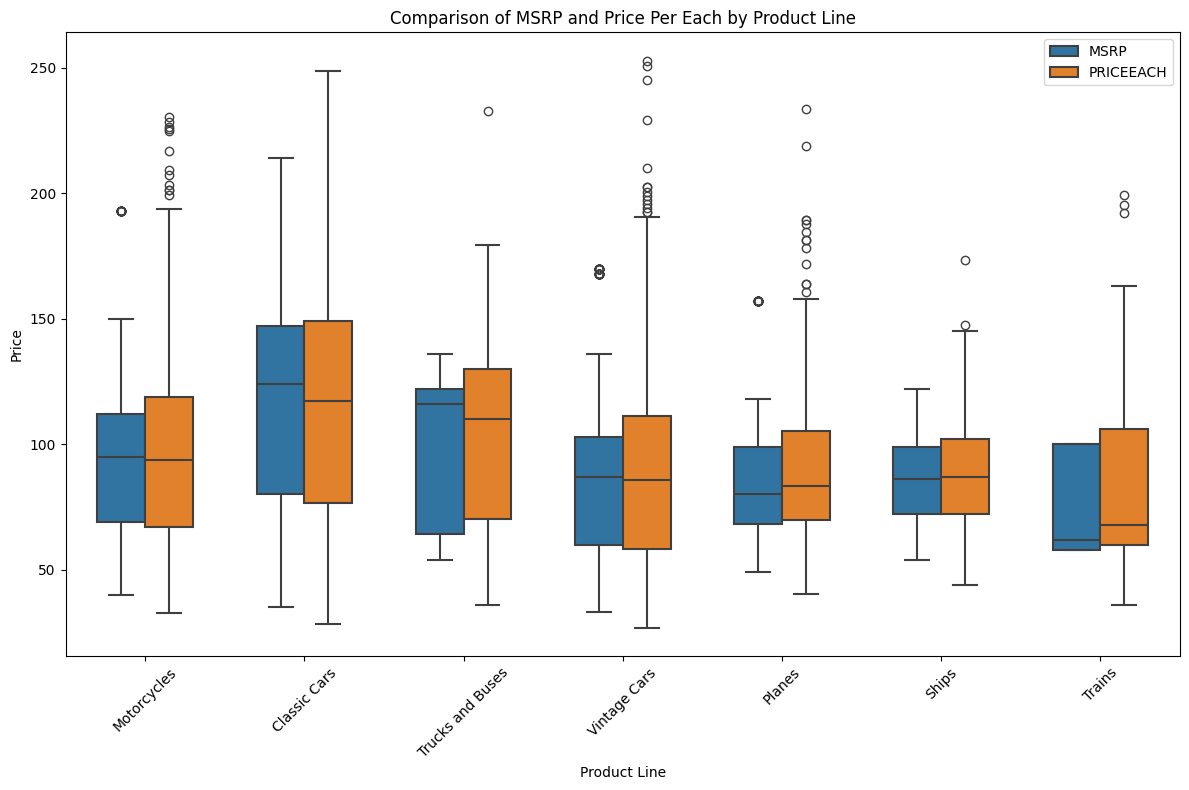

In [67]:
# Price Each vs. MSRP by Product Line
# Melt the DataFrame to have 'MSRP' and 'Price Per Each' in the same column with a new 'Type' column
melted_df = pd.melt(df, id_vars=['PRODUCTLINE'], value_vars=['MSRP', 'PRICEEACH'], var_name='Type', value_name='Price')

# Create a boxplot comparison per product line
plt.figure(figsize=(12, 8))
sns.boxplot(data=melted_df, x='PRODUCTLINE', y='Price', hue='Type', width=0.6, linewidth=1.5)

# Add labels and title
plt.xlabel('Product Line')
plt.ylabel('Price')
plt.title('Comparison of MSRP and Price Per Each by Product Line')

# Adjust legend position
plt.legend(loc='upper right')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

The main takeaway is that the Box Plots of each type of toy purchased are the outliers. The numbers are so strong for the Classic Cars there there are not any outliers in the data set. No matter how you visualize the Classic Car data the only conclusion to draw is how strong the sales performance numbers are for it. On the other hand, there exists a lot more variability in the Motorcycle, Vintage Cars, and Planes data. As such, I believe this reinforces the idea of introducing a loyalty program to reward these customers who are purchasing in extreme bulk. 



#### 3.2 Conclusion and Takeaways

Given the visualizations gathered in this section of our report, there is lot to be said about our buisness in where are stregths and weaknesses lie moving forward with futture operations. That is, what interesting questions can we draw upon the analysized datset? Some questions we came up with as a team that would help us better plan and bring future growth to the company consisted of the following:

- In what regions should we focus our buisness more in to increase are revenues?
- From which specfic product are most of our sales being generated? What can we do to increase the revuene of those not making us as much? Should we allocate our resources to other products or different departments within the business?
- Based on the time of the year, how does the analysis above that help us forsee what we need to do during the times when we are not geneearting as much revenue? 